In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # seaborn font 설정

import missingno as msno #결측값 시각화

import warnings
warnings.filterwarnings('ignore')#jupyter notebook warning sign 생략

%matplotlib inline 
#시각화

In [2]:
df_train = pd.read_csv("C:/Users/cod/Desktop/train.csv")
df_test = pd.read_csv("C:/Users/cod/Desktop/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.describe() #feature 통계치

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#결측값 측정
for col in df_train.columns:
    msg='column : {:>10} \t Percent of NaN value: {:.2f}%'.format(col,#{:>10} 글자 순서
    100*(df_train[col].isnull().sum()/df_train[col].shape[0])) #column의 null의 갯수 총합/column의 갯수
    print(msg)

column : PassengerId 	 Percent of NaN value: 0.00%
column :   Survived 	 Percent of NaN value: 0.00%
column :     Pclass 	 Percent of NaN value: 0.00%
column :       Name 	 Percent of NaN value: 0.00%
column :        Sex 	 Percent of NaN value: 0.00%
column :        Age 	 Percent of NaN value: 19.87%
column :      SibSp 	 Percent of NaN value: 0.00%
column :      Parch 	 Percent of NaN value: 0.00%
column :     Ticket 	 Percent of NaN value: 0.00%
column :       Fare 	 Percent of NaN value: 0.00%
column :      Cabin 	 Percent of NaN value: 77.10%
column :   Embarked 	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg='columns : {:<10} \t Percent of NaN value : {:.2f}%'.format(col,
    100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

columns : PassengerId 	 Percent of NaN value : 0.00%
columns : Pclass     	 Percent of NaN value : 0.00%
columns : Name       	 Percent of NaN value : 0.00%
columns : Sex        	 Percent of NaN value : 0.00%
columns : Age        	 Percent of NaN value : 20.57%
columns : SibSp      	 Percent of NaN value : 0.00%
columns : Parch      	 Percent of NaN value : 0.00%
columns : Ticket     	 Percent of NaN value : 0.00%
columns : Fare       	 Percent of NaN value : 0.24%
columns : Cabin      	 Percent of NaN value : 78.23%
columns : Embarked   	 Percent of NaN value : 0.00%


<AxesSubplot:>

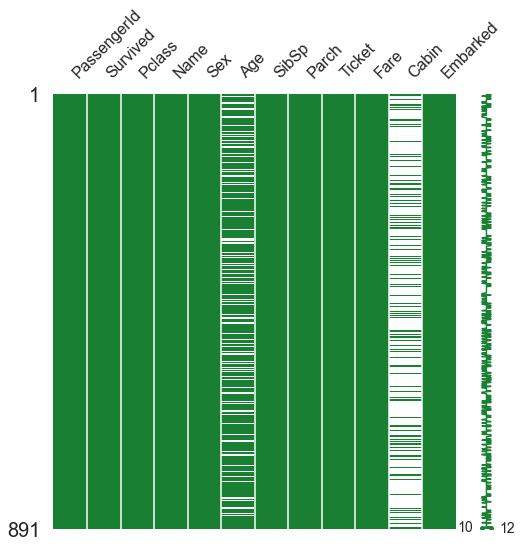

In [9]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8),color=(0.1,0.5,0.2)) 
#df_train의 모든 결측치 시각화 color, figsize 임의설정

<AxesSubplot:>

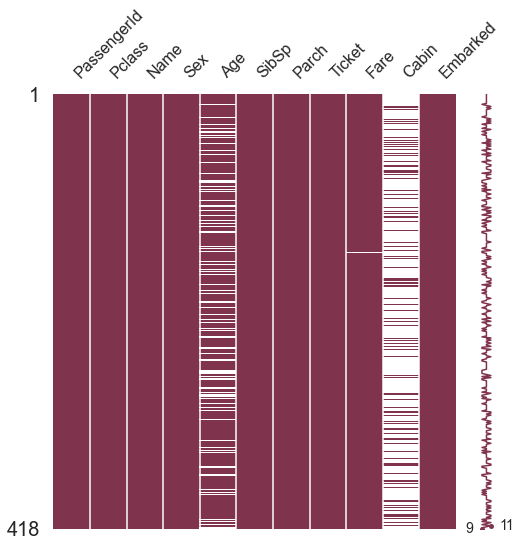

In [10]:
msno.matrix(df=df_test.iloc[:,:],figsize=(8,8),color=(0.5,0.2,0.3))

<AxesSubplot:>

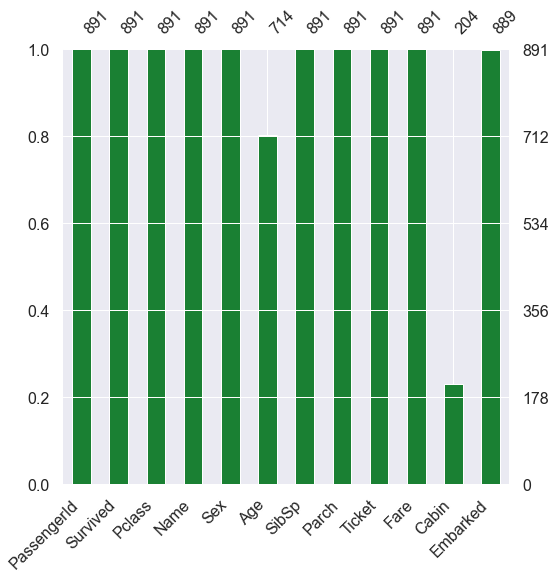

In [11]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.1,0.5,0.2))

<AxesSubplot:>

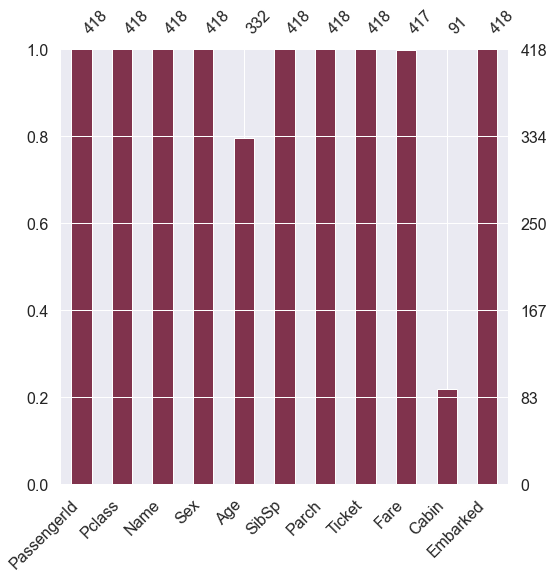

In [12]:
msno.bar(df=df_test.iloc[:], figsize=[8,8], color=[0.5,0.2,0.3])

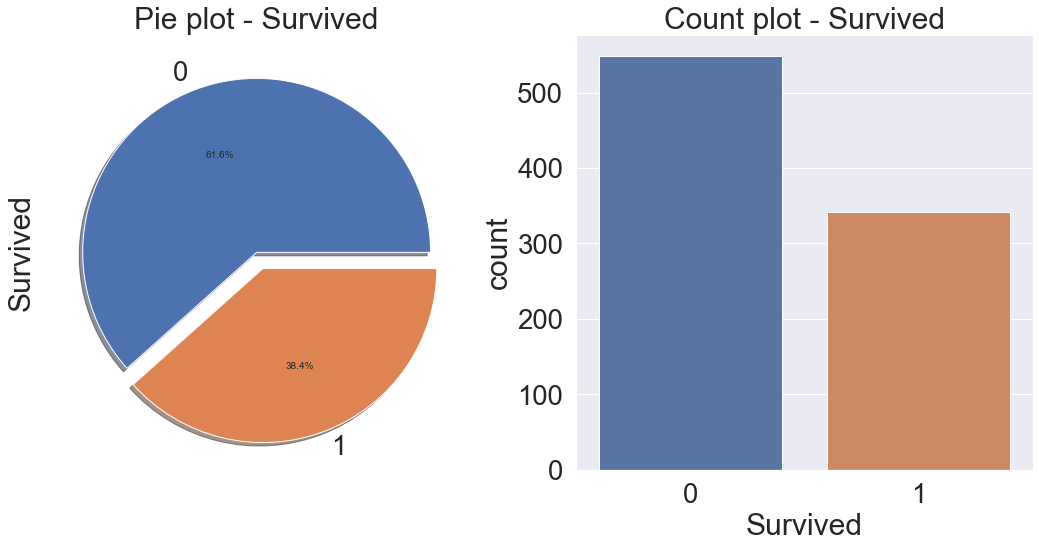

In [13]:
#target label 확인
f,ax=plt.subplots(1,2,figsize=(18,8)) #subplot(row,columns)

df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%.1f%%',
ax=ax[0],shadow=True)
#ax[0] 1번 칼럼 설정
#explode : 부채꼴과 중심의 거리
#부채꼴 안에서 보여질 숫자의 형식
#shadow 음영
ax[0].set_title('Pie plot - Survived')
sns.countplot('Survived',data=df_train,ax=ax[1])
#countplot(columns,data=pd.dataframe,ax=ax[1])
#ax[1] 2번 칼럼 설정
ax[1].set_title('Count plot - Survived')

plt.show()

In [14]:
#데이터 분석
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], 
            margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

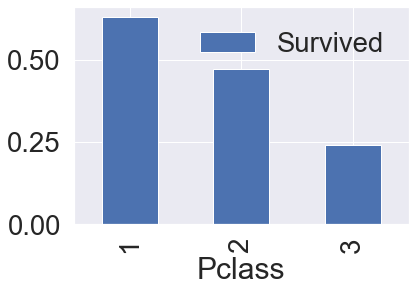

In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'],
                                    as_index=True).mean().sort_values(by='Survived',
                                      ascending=False).plot.bar()

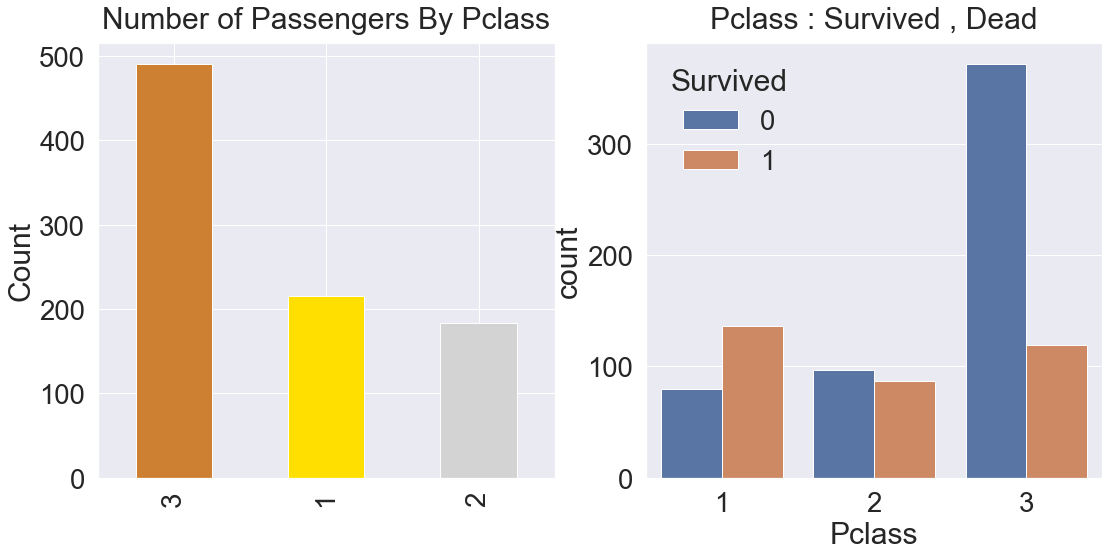

In [18]:
y_position = 1.02
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass : Survived , Dead', y=y_position)

plt.show()

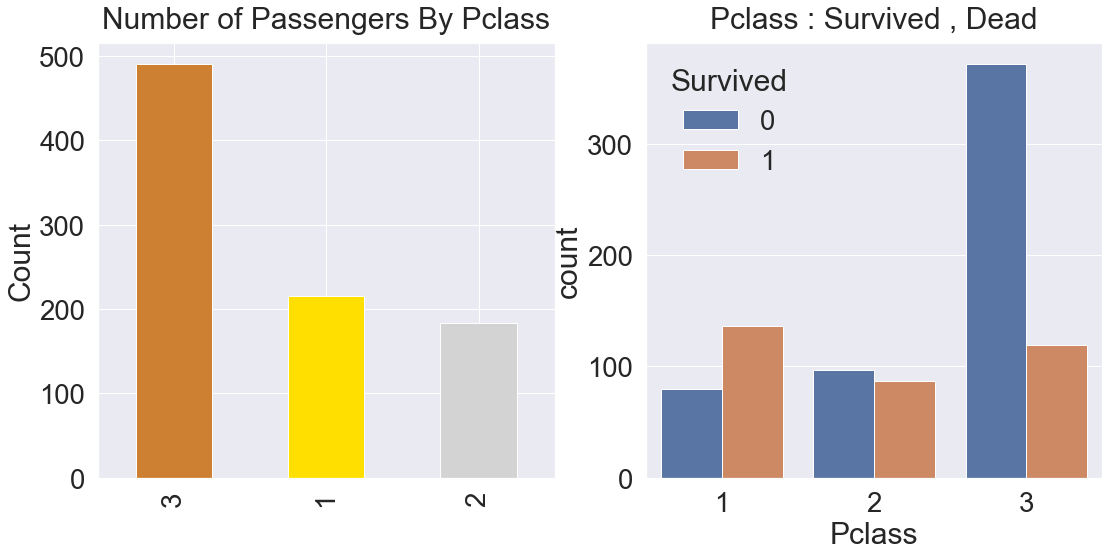

In [19]:
y_position = 1.02
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
# y_position : title과 graph의 거리
# 실 생존자 수
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
#hue parameter에 따라 그래프가 나뉨
ax[1].set_title('Pclass : Survived , Dead', y=y_position)

plt.show()

Text(0.5, 1.0, 'Sex : Survived , Dead')

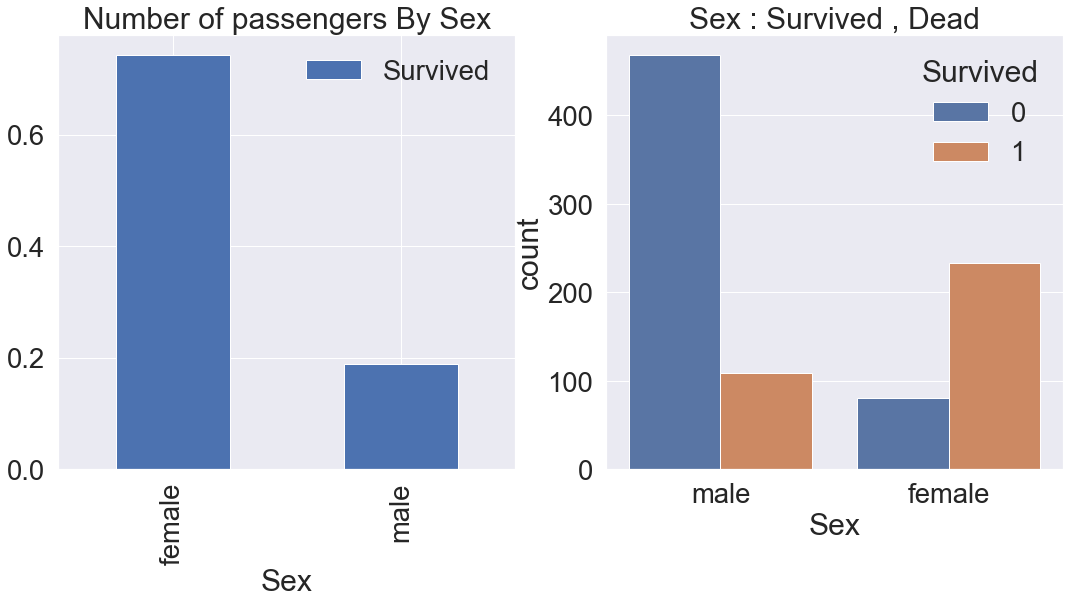

In [20]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train[['Sex','Survived']].groupby(['Sex'],
                            as_index=True).mean().plot.bar(ax=ax[0])
# Sex 별 생존률
ax[0].set_title('Number of passengers By Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex : Survived , Dead')

In [21]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


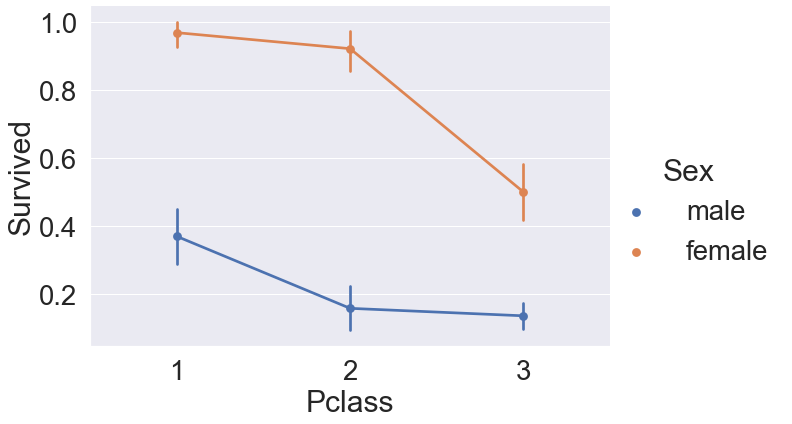

In [23]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

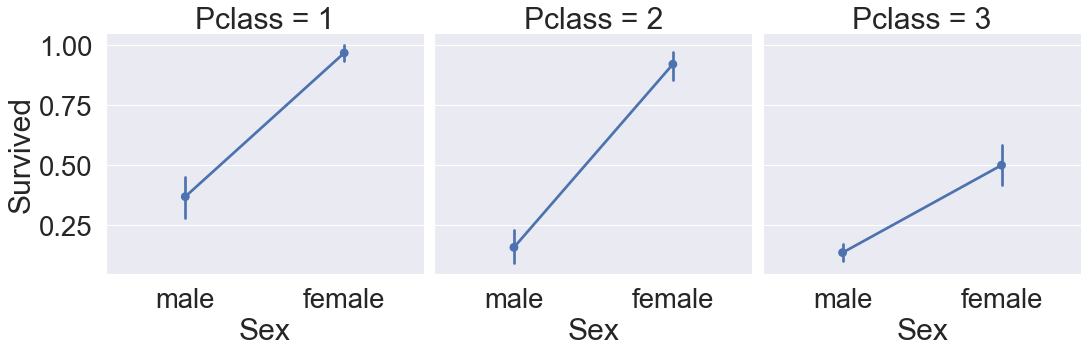

In [24]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',
               data=df_train,saturation=.5,size=5,aspect=1)
#saturation 채도

In [25]:
#Age
print('Oldest Age : {:.1f} Years'.format(df_train['Age'].max()))
print('Youngest Age : {:.1f} Years'.format(df_train['Age'].min()))
print('Mean Age : {:.1f} Years'.format(df_train['Age'].mean()))

Oldest Age : 80.0 Years
Youngest Age : 0.4 Years
Mean Age : 29.7 Years


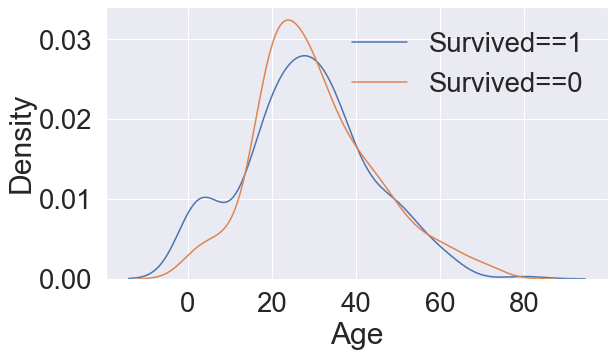

In [26]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1', 'Survived==0'])

plt.show()

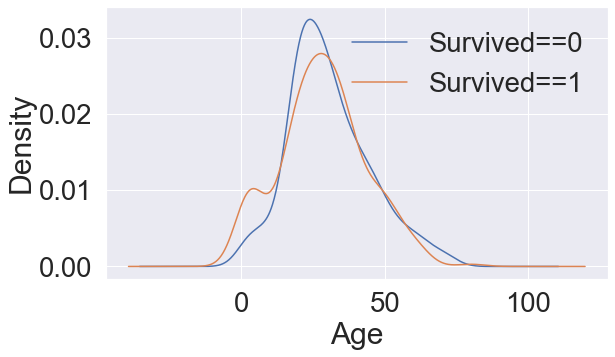

In [30]:
plt.figure(figsize=(9,5))
df_train['Age'][df_train['Survived']==0].plot(kind='kde')
df_train['Age'][df_train['Survived']==1].plot(kind='kde')

plt.xlabel('Age')
plt.legend(['Survived==0','Survived==1'])
plt.show()

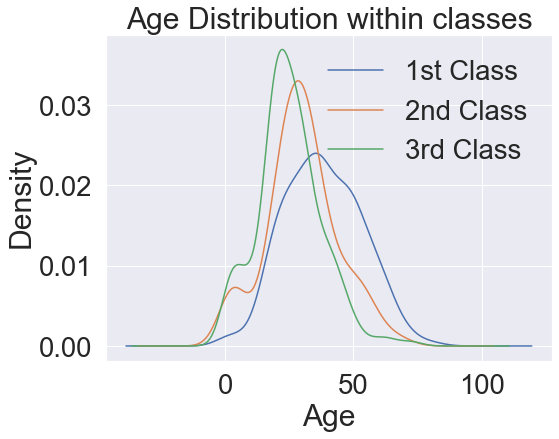

In [66]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class', '3rd Class'])

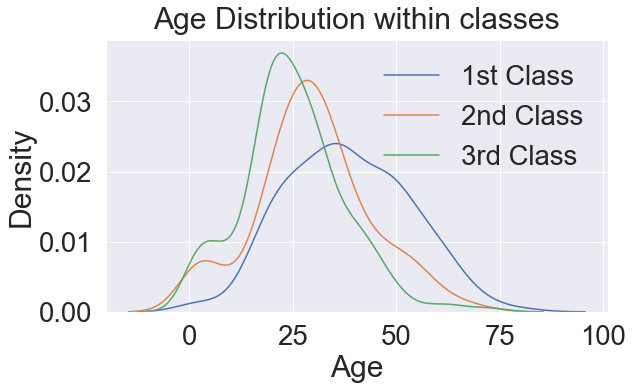

In [76]:
f,ax=plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[df_train['Pclass']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==2]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==3]['Age'],ax=ax)
plt.title('Age Distribution within classes', y=1.02)
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

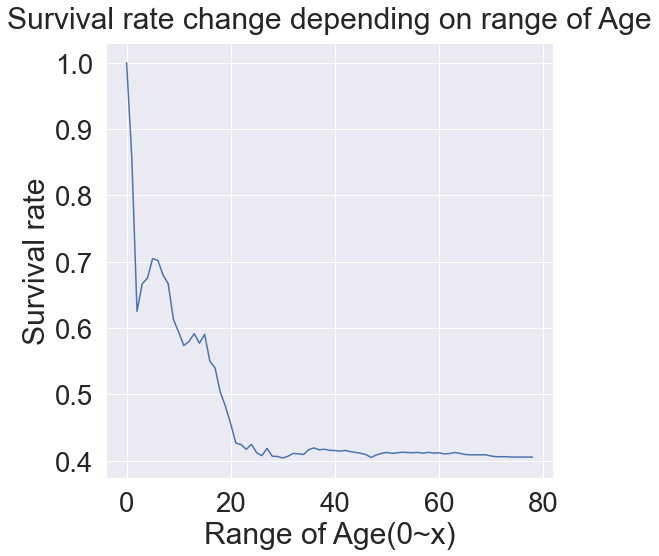

In [31]:
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age']<i]['Survived'].sum()/len(
            df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(8,8))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

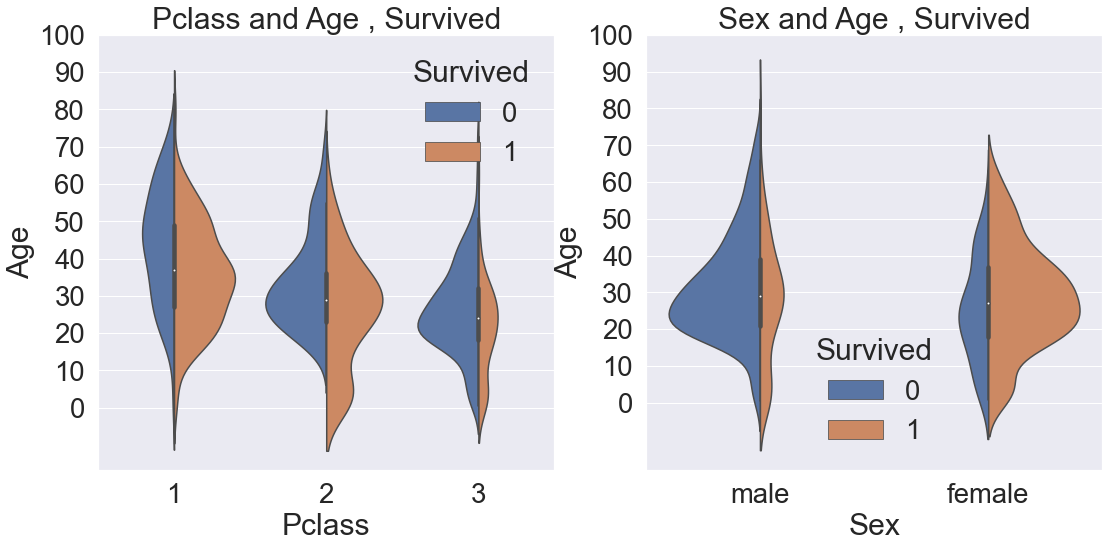

In [34]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',
               data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age , Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',
               data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age , Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


<AxesSubplot:xlabel='Embarked'>

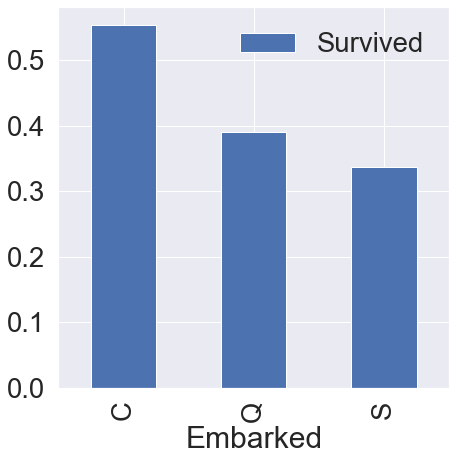

In [38]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],
                        as_index=True).mean().sort_values(by='Survived',
                                ascending=False).plot.bar(ax=ax)

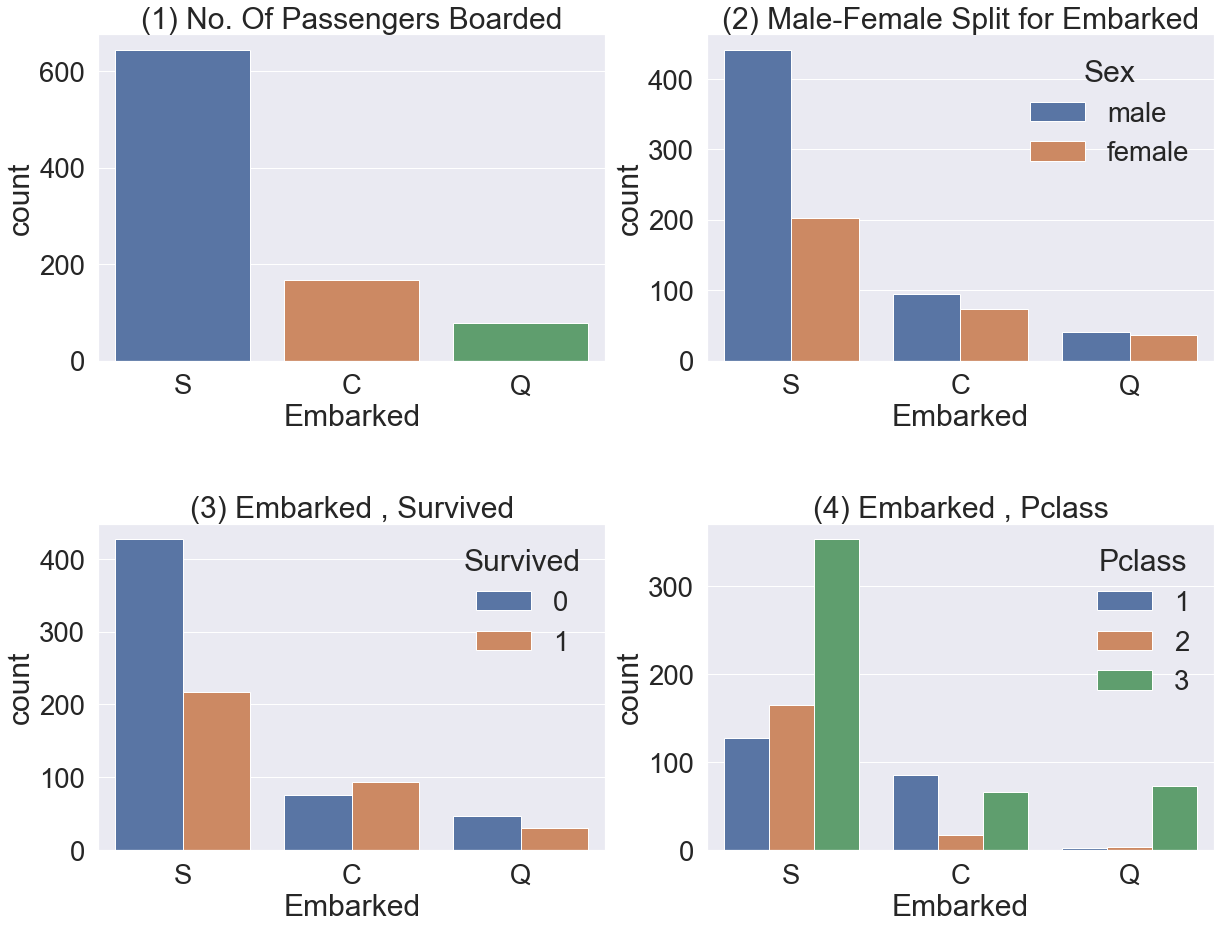

In [41]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked , Survived')
sns.countplot('Embarked', hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked , Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [42]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [43]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


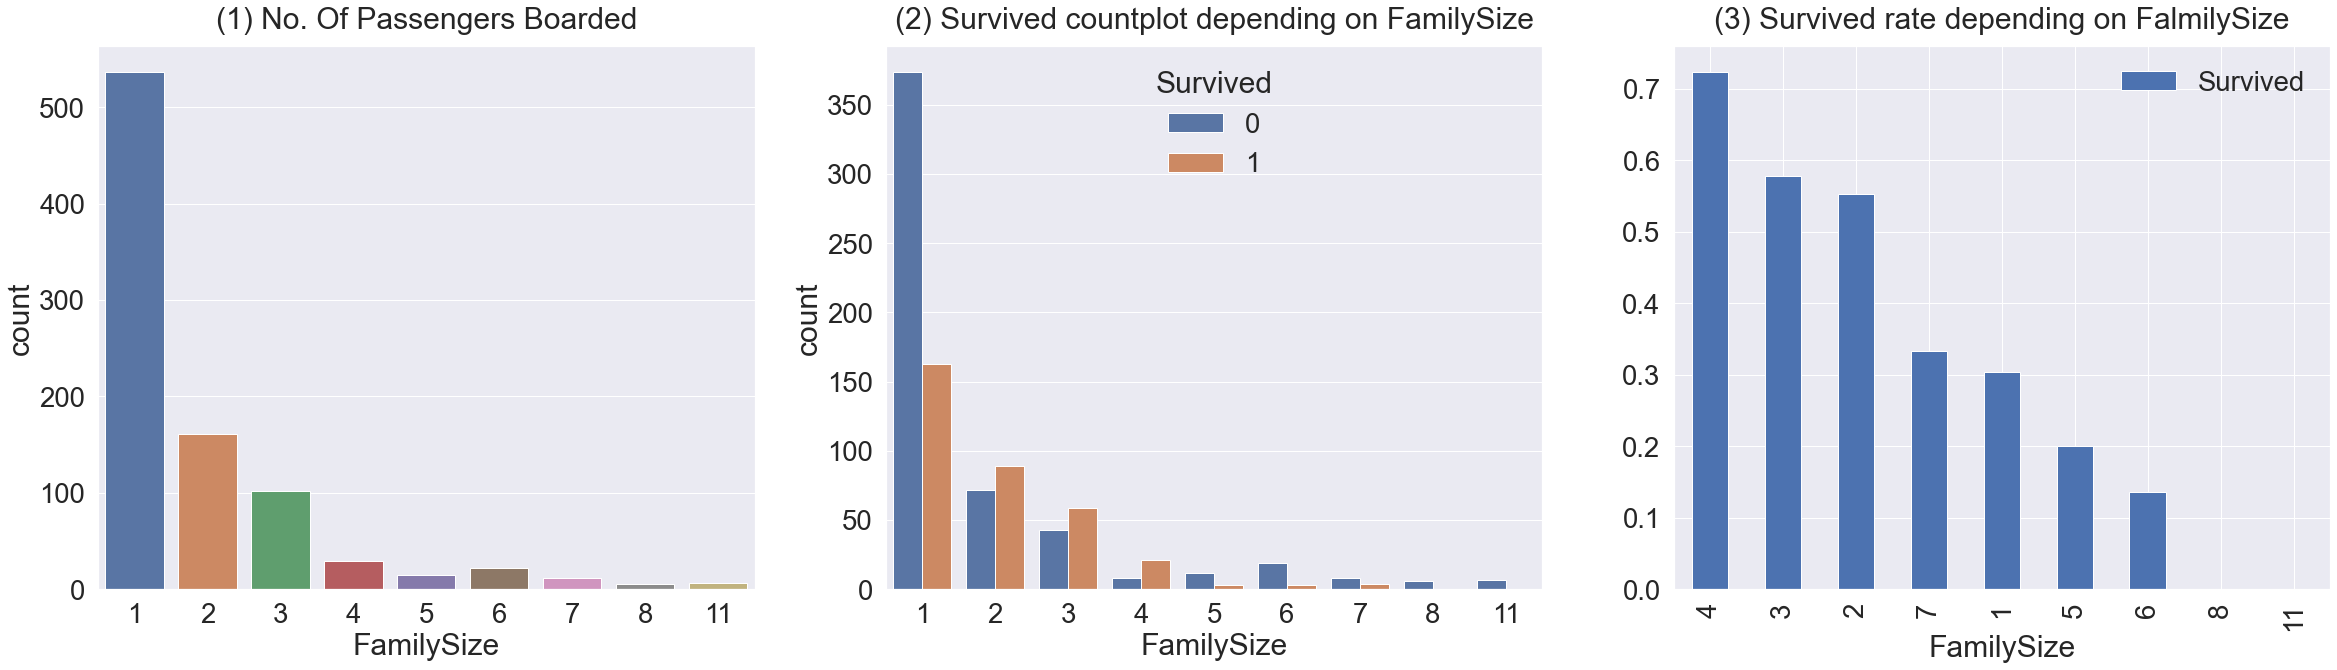

In [47]:
f,ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot('FamilySize', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)
df_train[['FamilySize',
          'Survived']].groupby('FamilySize',
            as_index=True).mean().sort_values(
            by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FalmilySize',y=1.02)
plt.show()


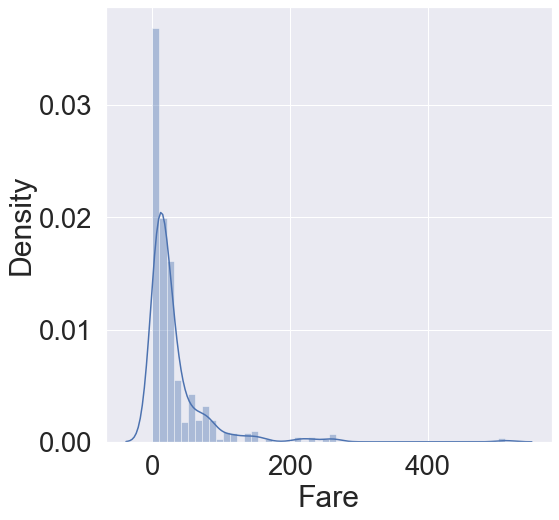

In [56]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', 
    label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
#skewness -2~2 not skewness

g = g.legend(loc='best')
#legend(loc='best') : 위치조정

In [58]:
df_test.loc[df_test.Fare.isnull(),'Fare']=df_test['Fare'].mean()

df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

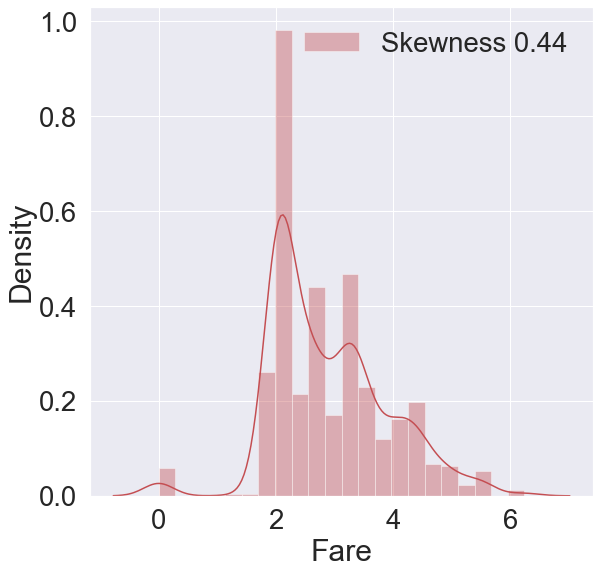

In [64]:
fig, ax=plt.subplots(1,1,figsize=(9,9))
g=sns.distplot(df_train['Fare'], color='r',
               label='Skewness {:.2f}'.format(df_train['Fare'].skew()),
               ax=ax)
g = g.legend(loc='best')

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [67]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64